In [1]:
#coding=utf-8
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.layers import Input,Dense,BatchNormalization,Conv2D,MaxPooling2D,AveragePooling2D,ZeroPadding2D
from tensorflow.python.keras.layers import add,Flatten
from tensorflow.python.keras.backend import squeeze
# from tensorflow.python.keras.optimizers import Adam
#from keras.layers.convolutional import Conv2D,MaxPooling2D,AveragePooling2D
# from tensorflow.python.keras.optimizers import SGD
import numpy as np
import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""  
def Conv2d_BN(x, nb_filter,kernel_size, strides=(1,1), padding='same',name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
 
    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,activation='relu',name=conv_name)(x)
    x = BatchNormalization(axis=3,name=bn_name)(x)
    return x
 
def Conv_Block(inpt,nb_filter,kernel_size,strides=(1,1), with_conv_shortcut=False):
    x = Conv2d_BN(inpt,nb_filter=nb_filter[0],kernel_size=(1,1),strides=strides,padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter[1], kernel_size=(3,3), padding='same')
    x = Conv2d_BN(x, nb_filter=nb_filter[2], kernel_size=(1,1), padding='same')
    if with_conv_shortcut:
        shortcut = Conv2d_BN(inpt,nb_filter=nb_filter[2],strides=strides,kernel_size=kernel_size)
        x = add([x,shortcut])
        return x
    else:
        x = add([x,inpt])
        return x
 
inpt = Input(shape=(256,256,1))
x=inpt
# x = ZeroPadding2D((3,3))(inpt)
x = Conv2d_BN(x,nb_filter=64,kernel_size=(7,7),strides=(2,2),padding='valid')
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)
 
 
x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3),strides=(1,1),with_conv_shortcut=True)
x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[64,64,256],kernel_size=(3,3))
 
x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)
x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[128,128,512],kernel_size=(3,3))
 
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[256,256,1024],kernel_size=(3,3))
 
x = Conv_Block(x,nb_filter=[512,512,2048],kernel_size=(3,3),strides=(2,2),with_conv_shortcut=True)
x = Conv_Block(x,nb_filter=[512,512,2048],kernel_size=(3,3))
x = Conv_Block(x,nb_filter=[512,512,2048],kernel_size=(3,3))
x = Dense(2,activation='sigmoid')(x)
model = Model(inputs=inpt,outputs=x)
# sgd = SGD(decay=0.0001,momentum=0.9)
# adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 125, 125, 64) 3200        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 125, 125, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 63, 63, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [2]:
data=np.load('/home/chase/Boyka/Lyu/rain_fall/data/data.npy')
data=np.expand_dims(data,axis=-1)
rain=np.load('/home/chase/Boyka/Lyu/rain_fall/data/label.npy')
# rain=np.expand_dims(rain,axis=-1)
print(data.shape,rain.shape)

(1000, 256, 256, 1) (1000, 8, 8, 2)


In [3]:
train_x=data[:-100]
test_x=data[-100:]
train_y=rain[:-100]
test_y=rain[-100:]

In [4]:
NUM_EPOCHS=50
BATCH_SIZE=64
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(900, 256, 256, 1) (100, 256, 256, 1) (900, 8, 8, 2) (100, 8, 8, 2)


In [5]:
history=model.fit(train_x, train_y, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(test_x, test_y),shuffle=True)
model.save('ResNet50_1000_50.h5')


Epoch 1/50
15/15 [==============================] - 168s 11s/step - loss: 2.6790 - accuracy: 0.7527 - val_loss: 28560.5605 - val_accuracy: 0.4919
Epoch 2/50
15/15 [==============================] - 165s 11s/step - loss: 0.3932 - accuracy: 0.8766 - val_loss: 32267.6094 - val_accuracy: 0.5147
Epoch 3/50
15/15 [==============================] - 164s 11s/step - loss: 0.2214 - accuracy: 0.9150 - val_loss: 1239.1868 - val_accuracy: 0.5147
Epoch 4/50
15/15 [==============================] - 164s 11s/step - loss: 0.2263 - accuracy: 0.9319 - val_loss: 221.0966 - val_accuracy: 0.5147
Epoch 5/50
15/15 [==============================] - 164s 11s/step - loss: 0.1277 - accuracy: 0.9545 - val_loss: 79.2463 - val_accuracy: 0.5147
Epoch 6/50
15/15 [==============================] - 165s 11s/step - loss: 0.1010 - accuracy: 0.9723 - val_loss: 2.2486 - val_accuracy: 0.5142
Epoch 7/50
15/15 [==============================] - 164s 11s/step - loss: 0.1668 - accuracy: 0.9396 - val_loss: 1.1917 - val_accuracy:

/home/chase/.local/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [18]:

loss, acc = model.evaluate(test_x, test_y, batch_size=BATCH_SIZE)

2/2 [==============================] - 8s 3s/step - loss: 0.2975 - accuracy: 0.9502


In [19]:
print(acc)
print(history.history.keys())
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

0.9501562714576721

Acc: 0.298
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


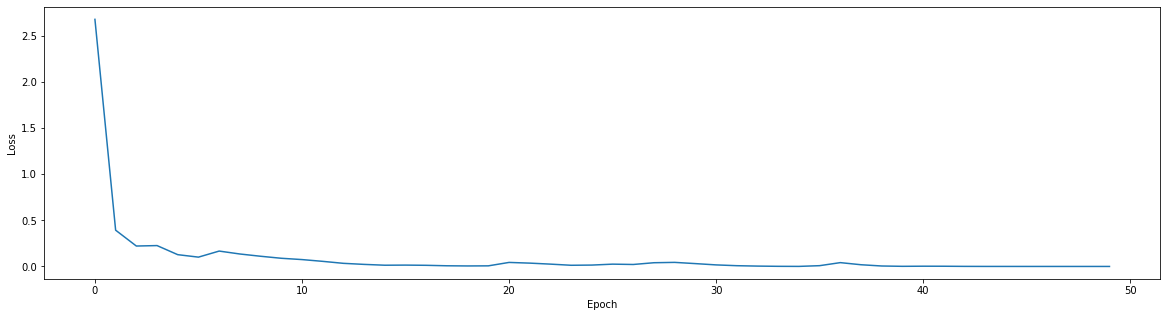

In [11]:
# model.save('ResNet50_1000_50.h5')
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot([i for i in range(len(loss))],loss)

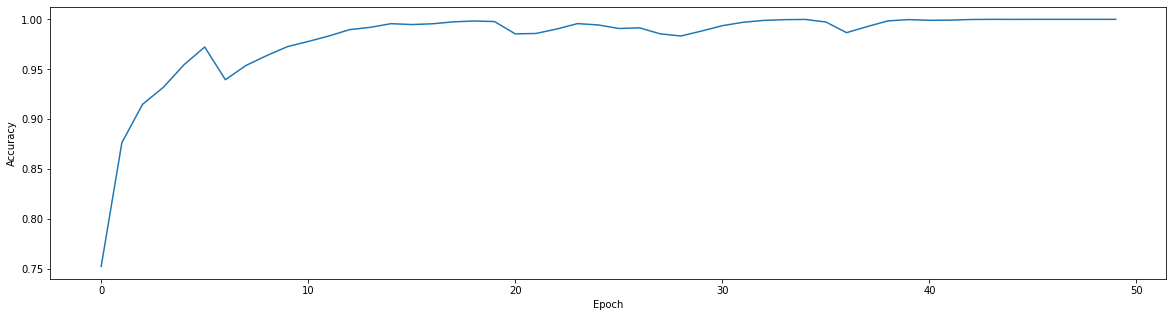

In [13]:
plt.figure(figsize=(20,5))
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot([i for i in range(len(accuracy))],accuracy)

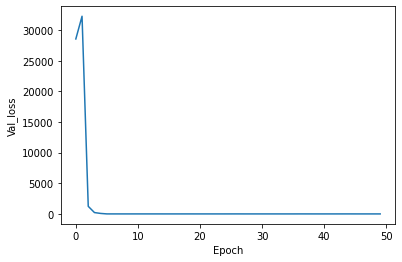

In [14]:
plt.xlabel('Epoch')
plt.ylabel('Val_loss')
plt.plot([i for i in range(len(val_loss))],val_loss)

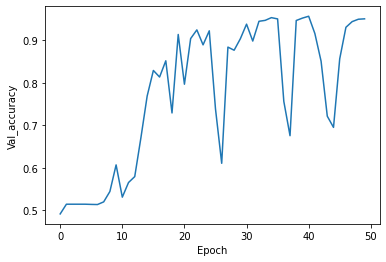

In [15]:
plt.xlabel('Epoch')
plt.ylabel('Val_accuracy')
plt.plot([i for i in range(len(val_accuracy))],val_accuracy)